### Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [4]:
# Imports 

# Imports para manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Imports para manipulação de imagens
import os
import cv2
import itertools
import shutil
import imageio
import skimage
import skimage.io
import skimage.transform
from pathlib import Path

# Imports para Deep Learning
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.metrics import binary_accuracy

# Imports para cálculo de métricas e outras tarefas
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Júlio Monteiro" --iversions

Author: Júlio Monteiro

sys       : 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
keras     : 2.3.1
sklearn   : 1.0.2
tensorflow: 2.3.1
numpy     : 1.18.5
matplotlib: 3.3.4
skimage   : 0.19.1
pandas    : 1.0.3
imageio   : 2.13.5
cv2       : 4.5.5



### Avaliação do Modelo

### Diretórios

In [6]:
dados_test = 'dataset/dados_test/'

In [7]:
# Aqui geramos os batches de dados
datagen = ImageDataGenerator(rescale = 1.0/255)

# Nota: shuffle = False faz com que o conjunto de dados de teste não seja "embaralhado"
gen_teste = datagen.flow_from_directory(dados_test,
                                        target_size = (256,256),
                                        batch_size = 1,
                                        class_mode = 'categorical',
                                        shuffle = False)

Found 102 images belonging to 2 classes.


### Modelo

In [12]:
# Carregamos o modelo treinado
model =  tensorflow.keras.models.load_model('modelos/modelo_raiox.h5')

In [13]:
# Extraímos as métricas
val_loss, val_acc = model.evaluate(gen_teste, steps = 102)

102/102 [==============================] - 1s 7ms/step - loss: 0.3758 - accuracy: 0.8137


### Previsões nos dados de teste

In [14]:
# Vamos obter os labels dos dados de teste
labels_teste = gen_teste.classes

In [15]:
# Precisamos dos labels para o plot da matriz de confusão
labels_teste.shape

(102,)

In [16]:
# Imprimimos a etiqueta (label) associada a cada classe
gen_teste.class_indices

{'Normal': 0, 'Tuberculose': 1}

In [19]:
# Fazemos as previsões
previsoes = model.predict(gen_teste, steps = 102, verbose = 1)

102/102 [==============================] - 1s 7ms/step


In [20]:
# Shape das previsões
previsoes.shape

(102, 2)

Vamos plotar uma Matriz de Confusão - Confusion Matrix.

In [26]:
# Função para a Matriz de Confusão
def plot_confusion_matrix(cm, 
                          classes,
                          normalize = False,
                          title = 'Matriz de Confusão',
                          cmap = plt.cm.Blues):

    # Se normalize = True, obtemos a matriz de confusão com dados normalizados
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão Sem Normalização')

    # Mostramos a Matriz de Confusão
    print(cm)

    # Plot
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Plot do texto
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('Label Verdadeiro')
    plt.xlabel('Label Previsto')
    plt.tight_layout()

In [27]:
# A função argmax() retorna o índice do valor máximo em uma linha
matriz_conf = confusion_matrix(labels_teste, previsoes.argmax(axis = 1))

In [28]:
# Labels dos dados de teste
gen_teste.class_indices

{'Normal': 0, 'Tuberculose': 1}

In [29]:
# Definimos os rótulos dos labels da classe. Eles precisam corresponder a ordem mostrada acima.
matriz_conf_plot_labels = ['Normal', 'Tuberculose']

Matriz de Confusão Sem Normalização
[[46  6]
 [13 37]]


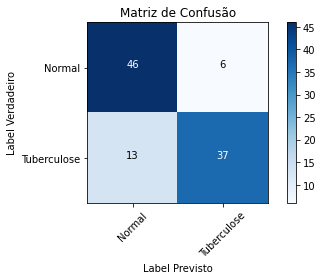

In [30]:
# E então criamos o plot
plot_confusion_matrix(matriz_conf, matriz_conf_plot_labels, title = 'Matriz de Confusão')

### Relatório de Classificação

In [31]:
# Geramos a sequência na qual o gerador processou as imagens de teste
imagens_teste = gen_teste.filenames

In [32]:
imagens_teste

['Normal/CHNCXR_0001_0.png',
 'Normal/CHNCXR_0027_0.png',
 'Normal/CHNCXR_0032_0.png',
 'Normal/CHNCXR_0036_0.png',
 'Normal/CHNCXR_0037_0.png',
 'Normal/CHNCXR_0042_0.png',
 'Normal/CHNCXR_0052_0.png',
 'Normal/CHNCXR_0053_0.png',
 'Normal/CHNCXR_0070_0.png',
 'Normal/CHNCXR_0073_0.png',
 'Normal/CHNCXR_0084_0.png',
 'Normal/CHNCXR_0086_0.png',
 'Normal/CHNCXR_0090_0.png',
 'Normal/CHNCXR_0092_0.png',
 'Normal/CHNCXR_0110_0.png',
 'Normal/CHNCXR_0121_0.png',
 'Normal/CHNCXR_0123_0.png',
 'Normal/CHNCXR_0124_0.png',
 'Normal/CHNCXR_0125_0.png',
 'Normal/CHNCXR_0146_0.png',
 'Normal/CHNCXR_0153_0.png',
 'Normal/CHNCXR_0166_0.png',
 'Normal/CHNCXR_0181_0.png',
 'Normal/CHNCXR_0184_0.png',
 'Normal/CHNCXR_0191_0.png',
 'Normal/CHNCXR_0201_0.png',
 'Normal/CHNCXR_0205_0.png',
 'Normal/CHNCXR_0211_0.png',
 'Normal/CHNCXR_0215_0.png',
 'Normal/CHNCXR_0217_0.png',
 'Normal/CHNCXR_0226_0.png',
 'Normal/CHNCXR_0246_0.png',
 'Normal/CHNCXR_0254_0.png',
 'Normal/CHNCXR_0257_0.png',
 'Normal/CHNCX

In [33]:
# Obtemos os rótulos verdadeiros
y_true = gen_teste.classes

In [34]:
# Obtemos os rótulos previstos
y_pred = previsoes.argmax(axis=1)

In [35]:
from sklearn.metrics import classification_report

In [36]:
# Gera o relatório de classificação
report = classification_report(y_true, y_pred, target_names = matriz_conf_plot_labels)
print(report)

              precision    recall  f1-score   support

      Normal       0.78      0.88      0.83        52
 Tuberculose       0.86      0.74      0.80        50

    accuracy                           0.81       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.82      0.81      0.81       102



- Recall = Dada uma classe, o classificador será capaz de detectá-la?

- Precision = Dada uma previsão de classe, qual a probabilidade de estar correta?

- F1 Score = A média harmônica de Recall e Precision. Essencialmente, ele pune valores extremos.

No geral, modelo apresenta um bom equilíbrio, embora ainda tenhamos espaço para melhorias.